In [ ]:
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 4.2 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=1f283411c6bb116f2dbbf76c4b8555f157139e97f6a03ed7220bcc5c2f4a6c8e
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fields = ['PeriodStart', 'Ghi Curr Day'] # we only want to use these rows
filename = "/content/drive/MyDrive/imdc/Irradiance_39.xlsx"
df = pd.read_excel(filename, usecols=fields)
print(df.info)


<bound method DataFrame.info of                 PeriodStart  Ghi Curr Day
0      2020-01-02T00:00:00Z             0
1      2020-01-02T00:30:00Z             0
2      2020-01-02T01:00:00Z             0
3      2020-01-02T01:30:00Z             0
4      2020-01-02T02:00:00Z             0
...                     ...           ...
17515  2020-12-31T21:30:00Z             0
17516  2020-12-31T22:00:00Z             0
17517  2020-12-31T22:30:00Z             0
17518  2020-12-31T23:00:00Z             0
17519  2020-12-31T23:30:00Z             0

[17520 rows x 2 columns]>


In [29]:
data = df['Ghi Curr Day'][1:37]
# training the model
model = ExponentialSmoothing(data, trend="add", damped=True, seasonal="add", seasonal_periods=2)
model_fit = model.fit()

# make forecast
forecast = model_fit.predict()
#print("Actual values:", data)
print("Forecast values:", forecast)

Forecast values: 38    78.842517
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [30]:
xpoints = df['PeriodStart'][1:38].values
ypoints = df['Ghi Curr Day'][1:37].values
rcParams["figure.figsize"] = 20,5
print("x-axis", xpoints)
print("y-axis", ypoints)

x-axis ['2020-01-02T00:30:00Z' '2020-01-02T01:00:00Z' '2020-01-02T01:30:00Z'
 '2020-01-02T02:00:00Z' '2020-01-02T02:30:00Z' '2020-01-02T03:00:00Z'
 '2020-01-02T03:30:00Z' '2020-01-02T04:00:00Z' '2020-01-02T04:30:00Z'
 '2020-01-02T05:00:00Z' '2020-01-02T05:30:00Z' '2020-01-02T06:00:00Z'
 '2020-01-02T06:30:00Z' '2020-01-02T07:00:00Z' '2020-01-02T07:30:00Z'
 '2020-01-02T08:00:00Z' '2020-01-02T08:30:00Z' '2020-01-02T09:00:00Z'
 '2020-01-02T09:30:00Z' '2020-01-02T10:00:00Z' '2020-01-02T10:30:00Z'
 '2020-01-02T11:00:00Z' '2020-01-02T11:30:00Z' '2020-01-02T12:00:00Z'
 '2020-01-02T12:30:00Z' '2020-01-02T13:00:00Z' '2020-01-02T13:30:00Z'
 '2020-01-02T14:00:00Z' '2020-01-02T14:30:00Z' '2020-01-02T15:00:00Z'
 '2020-01-02T15:30:00Z' '2020-01-02T16:00:00Z' '2020-01-02T16:30:00Z'
 '2020-01-02T17:00:00Z' '2020-01-02T17:30:00Z' '2020-01-02T18:00:00Z'
 '2020-01-02T18:30:00Z']
y-axis [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  40  80 141 263
 427 492 500 523 430 640 687 823 808 833 787 395

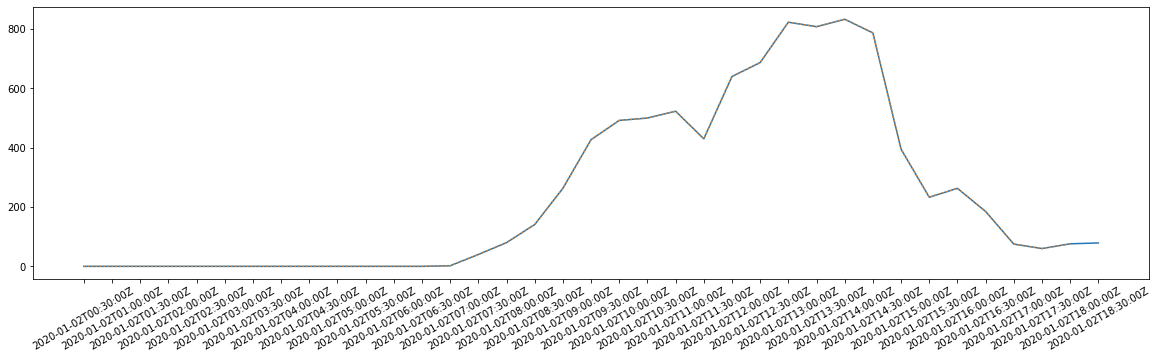

In [31]:
rcParams["figure.figsize"] = 20,5
# Plot the forecast 

actual_x = df['PeriodStart'][1:37].values
actual_y = ypoints


prediction_x = xpoints
prediction_y = np.concatenate((ypoints, forecast))
plt.xticks(rotation=30)
plt.plot(prediction_x, prediction_y, label='Energy Forecast', linestyle="-")
plt.plot(actual_x, actual_y, label='Energy Data', linestyle=":")



<bound method DataFrame.info of                 PeriodStart  Ghi Curr Day
0      2020-01-02T00:00:00Z             0
1      2020-01-02T00:30:00Z             0
2      2020-01-02T01:00:00Z             0
3      2020-01-02T01:30:00Z             0
4      2020-01-02T02:00:00Z             0
...                     ...           ...
17515  2020-12-31T21:30:00Z             0
17516  2020-12-31T22:00:00Z             0
17517  2020-12-31T22:30:00Z             0
17518  2020-12-31T23:00:00Z             0
17519  2020-12-31T23:30:00Z             0

[17520 rows x 2 columns]>
Forecast values: 21    753.014491
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


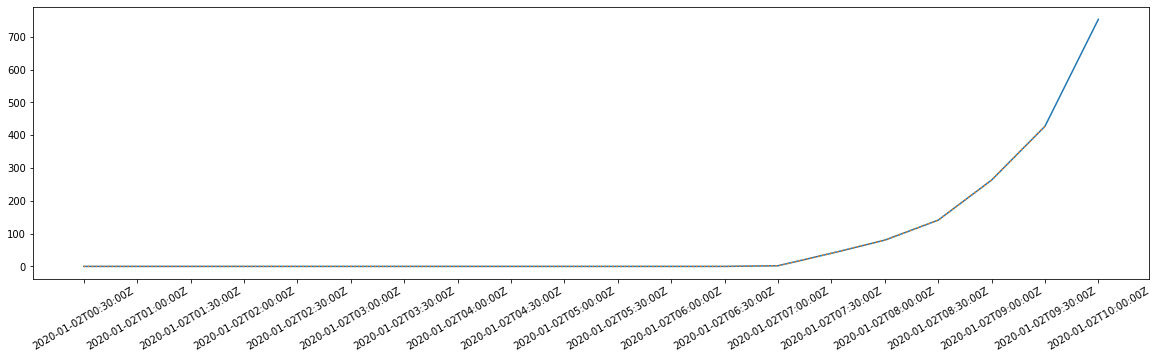

In [34]:
# Load the data
fields = ['PeriodStart', 'Ghi Curr Day'] # we only want to use these rows
filename = "/content/drive/MyDrive/imdc/Irradiance_39.xlsx"
df = pd.read_excel(filename, usecols=fields)
print(df.info) # print the dataframe

# select a specific segment of the data
data = df['Ghi Curr Day'][1:20]

# training the model
model = ExponentialSmoothing(data, trend="add", damped=True, seasonal="add", seasonal_periods=2)
model_fit = model.fit()

# get forecast/prediction
forecast = model_fit.predict()
#print("Actual values:", data)
print("Forecast values:", forecast)

# size of the graph
rcParams["figure.figsize"] = 20,5

# Plot the forecast 
actual_x = df['PeriodStart'][1:20].values
ypoints = df['Ghi Curr Day'][1:20].values
actual_y = ypoints


prediction_x = df['PeriodStart'][1:21].values # include the next time series
prediction_y = np.concatenate((ypoints, forecast))
plt.xticks(rotation=30)
plt.plot(prediction_x, prediction_y, label='Energy Forecast', linestyle="-")
plt.plot(actual_x, actual_y, label='Energy Data', linestyle=":")